# **Logistic Regression from Scratch**

### This notebook demonstrates logistic regression using multiple approaches:
- ### Using `sklearn`
- ### Perceptron trick with step function
- ### Perceptron trick with sigmoid
- ### Logistic regression using sigmoid and gradient descent

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## 📊 Section 1: Dataset Generation

#### Creating a simple synthetic dataset for binary classification using `make_classification`.

In [117]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, 
                          hypercube=False, class_sep=30, random_state=41)

In [118]:
X.shape

(100, 2)

In [119]:
y.shape

(100,)

## 🖼️ Section 2: Visualizing the Data

#### Plotting the data points to understand the distribution.

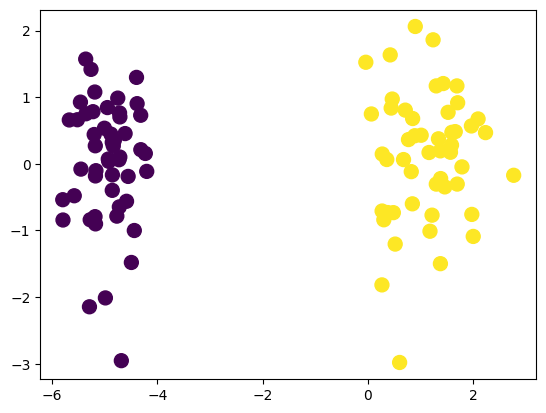

In [120]:
plt.scatter(X[:,0],X[:,1],c=y, s=100) # scatter plot colored by class

## 🤖 Section 3: Logistic Regression using Sklearn

#### Fitting a simple logistic regression model using `sklearn` as a baseline.

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [123]:
log_reg.coef_

array([[1.77298737, 0.0122258 ]])

In [124]:
log_reg.intercept_

array([3.54861952])

In [125]:
m_logreg = -(log_reg.coef_[0][0]/log_reg.coef_[0][1])
b_logreg = -(log_reg.intercept_/log_reg.coef_[0][1])

In [126]:
x_log_reg = np.linspace(-3, 3, 100)
y_log_reg = m_logreg*x_log_reg + b_logreg

(-3.0, 2.0)

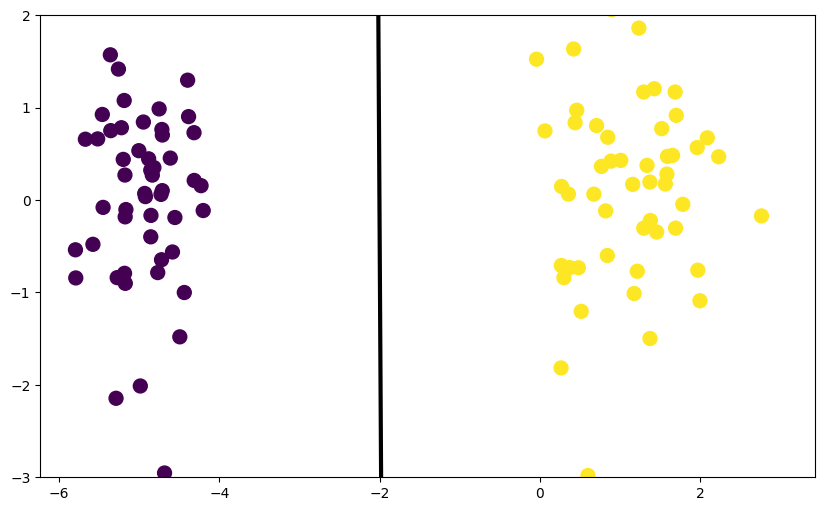

In [127]:
plt.figure(figsize=(10,6))
plt.plot(x_log_reg, y_log_reg, color='black', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.ylim(-3,2)

## 🧠 Section 4: Perceptron using Step Function

#### Implementing perceptron learning with a step activation.

In [128]:
class Perceptron_Step:
    def __init__(self, lr):
        self.lr = lr
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        weights = np.ones(X.shape[1])

        for i in range(70000):
            j = np.random.randint(0, X.shape[0])
            y_hat = step(np.dot(weights, X[j]))
            weights = weights + self.lr * (y[j]-y_hat) * X[j]

        self.intercept = weights[0]
        self.coefficients = weights[1:]

In [129]:
def step(z):
    return 1 if z>0 else 0

In [130]:
per_step = Perceptron_Step(0.7)

In [131]:
per_step.fit(X,y)

In [132]:
per_step.coefficients

array([ 1.18638251, -0.27164758])

In [133]:
per_step.intercept

1.7

In [134]:
m_per_step = -(per_step.coefficients[0]/per_step.coefficients[1])
b_per_step = -(per_step.intercept/per_step.coefficients[1])

In [135]:
x_per_step = np.linspace(-3, 3, 100)
y_per_step = m_per_step*x_per_step + b_per_step

(-3.0, 2.0)

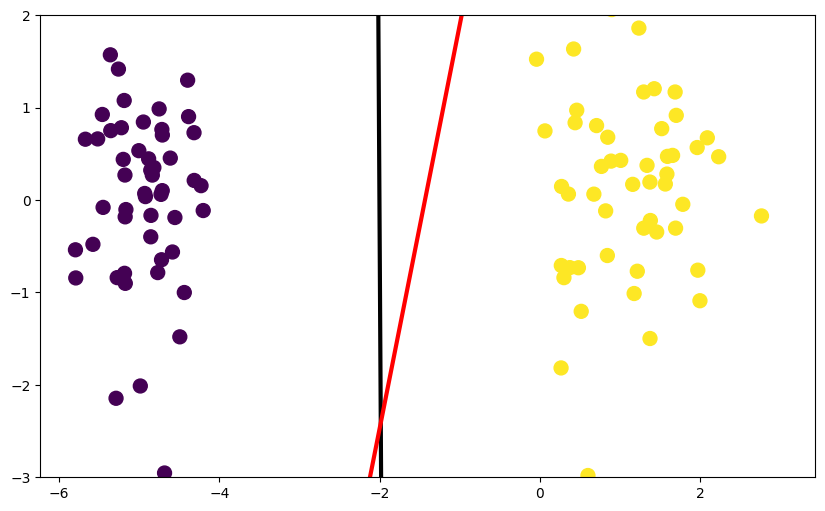

In [136]:
plt.figure(figsize=(10,6))
plt.plot(x_log_reg, y_log_reg, color='black', linewidth=3)
plt.plot(x_per_step, y_per_step, color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.ylim(-3,2)

## 📈 Section 5: Perceptron using Sigmoid Function

#### Implementing perceptron learning with a sigmoid activation.

In [137]:
class Perceptron_Sigmoid:
    def __init__(self, lr):
        self.lr = lr
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        weights = np.ones(X.shape[1])

        for i in range(70000):
            j = np.random.randint(0, X.shape[0])
            y_hat = sigmoid(np.dot(weights, X[j]))
            weights = weights + self.lr * (y[j]-y_hat) * X[j]

        self.intercept = weights[0]
        self.coefficients = weights[1:]

In [138]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [139]:
per_sig = Perceptron_Sigmoid(0.7)

In [140]:
per_sig.fit(X,y)

In [141]:
per_sig.coefficients

array([4.56029591, 0.20334683])

In [142]:
per_sig.intercept

7.710118328662992

In [143]:
m_per_sig = -(per_sig.coefficients[0]/per_sig.coefficients[1])
b_per_sig = -(per_sig.intercept/per_sig.coefficients[1])

In [144]:
x_per_sig = np.linspace(-3,3,100)
y_per_sig = m_per_sig*x_per_sig + b_per_sig

(-3.0, 2.0)

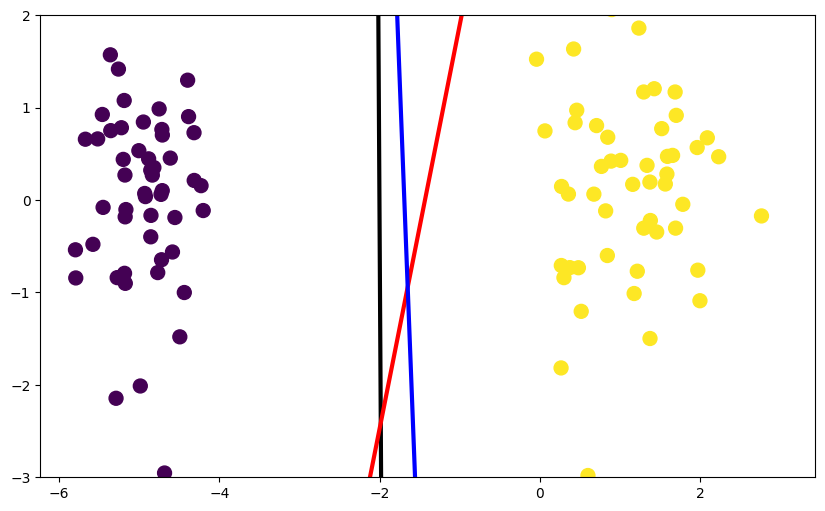

In [145]:
plt.figure(figsize=(10,6))
plt.plot(x_log_reg, y_log_reg, color='black', linewidth=3)
plt.plot(x_per_step, y_per_step, color='red', linewidth=3)
plt.plot(x_per_sig, y_per_sig, color='blue', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.ylim(-3,2)

## 🔁 Section 6: Logistic Regression using Gradient Descent

#### Implementing logistic regression using sigmoid activation and training it with gradient descent.

In [146]:
class LogReg_Gradient:
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        weights = np.ones(X.shape[1])

        for i in range(self.epochs):
            y_hat = sigmoid(np.dot(X, weights))
            weights = weights + self.lr * np.dot((y-y_hat),X)/X.shape[0]

        self.intercept = weights[0]
        self.coefficients = weights[1:]

In [147]:
my_logreg = LogReg_Gradient(0.7, 70000)

In [148]:
my_logreg.fit(X,y)

In [149]:
my_logreg.coefficients

array([4.57053109, 0.22019381])

In [150]:
my_logreg.intercept

7.708009424847647

In [151]:
m_my_logreg = -(my_logreg.coefficients[0]/my_logreg.coefficients[1])
b_my_logreg = -(my_logreg.intercept/my_logreg.coefficients[1])

In [152]:
x_my_logreg = np.linspace(-3,3,100)
y_my_logreg = m_my_logreg*x_my_logreg + b_my_logreg

(-3.0, 2.0)

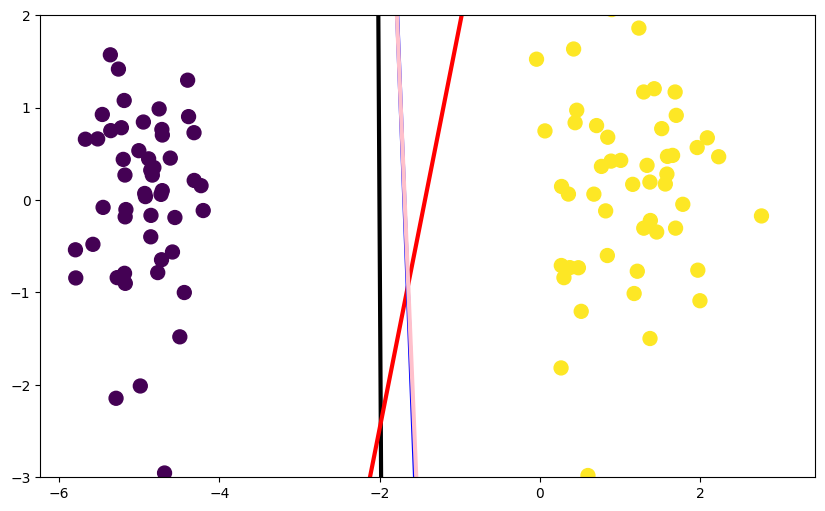

In [153]:
plt.figure(figsize=(10,6))
plt.plot(x_log_reg, y_log_reg, color='black', linewidth=3)
plt.plot(x_per_step, y_per_step, color='red', linewidth=3)
plt.plot(x_per_sig, y_per_sig, color='blue', linewidth=3)
plt.plot(x_my_logreg, y_my_logreg, color='pink', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.ylim(-3,2)

## Summary

- ### Compared sklearn's implementation with custom implementations.
- ### Demonstrated training with gradient descent.
- ### Step function gave least reliable separation line.
- ### Sigmoid function gave similar line with both gradient descent and perceptron trick.